In [163]:
import os
import sys
import fasttext
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neattext.functions as nfx
import requests

module_path = os.path.abspath(os.path.join('..', '..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [138]:
climat_topics=['T10753', 'T11988', 'T10122', 'T10139', 'T10577', 'T11862', 'T13377', 'T10898', 'T12981', 'T10174', 'T11405', 'T13396', 'T12213', 'T12639', 'T11056', 'T11880', 'T11753', 'T10439', 'T10766', 'T10438', 'T12806', 'T11244', 'T11186', 'T10029', 'T11588', 'T10075', 'T10017', 'T10644', 'T10895', 'T10266', 'T10230', 'T11320', 'T10341', 'T10005', 'T10347', 'T10765', 'T10032', 'T11333', 'T10226', 'T10466', 'T10647', 'T11483', 'T10330', 'T10471', 'T10199', 'T10555', 'T11259', 'T11594', 'T10643', 'T10319', 'T10487', 'T10435', 'T10659', 'T10089','T10255', 'T11088', 'T10930', 'T12073', 'T11459', 'T11061', 'T10302', 'T10190', 'T10779', 'T10535', 'T12617', 'T12414', 'T10166', 'T10004', 'T10889', 'T11913', 'T10398', 'T11760']


In [139]:
climat_topics_str=['climate change','marine ecosystems','ecology','ecological','environmental','methane emission','ocean acidification','arctic sea ice','environmental impact','climate ethics','hydrological cycle','energy transition','influence of climate','urban heat islands','mitigation strategies','impact on climate','environmental policies','carbon dioxide capture','carbon dioxide storage','soil carbon dynamics','sustainable development','environmental governance','atmospheric aerosols','marine biogeochemistry','biodiversity','global flood risk','arctic sea ice','ocean surface waves and wind interaction','aeolian geomorphology','wind erosion dynamics','coastal protection','water resource management','air pollution','deforestation','energy efficiency','global drought','landslide hazards','paleoclimat',"climate resilience", "climate adaptation", "carbon footprint", "carbon neutrality", "climate mitigation", "climate models", "climate scenarios", "zero emissions", "renewable energy", "sustainable agriculture", "ecosystem services", "climate vulnerability", "climate impacts", "climate policy", "global warming", "low-carbon", "climate change adaptation strategies", "ecosystem-based adaptation", "climate finance", "fossil fuel phase-out", "carbon trading", "climate-induced displacement", "environmental resilience", "greenhouse gas emissions", "land-use change", "climate risk assessment", "climate-induced migration", "carbon sequestration", "bioenergy", "energy transition pathways", "climate justice", "climate-sensitive diseases", "adaptation planning", "geoengineering", "flood management", "ecosystem restoration", "heat stress", "mitigation", "carbon pricing", "sustainable forestry", "blue carbon", "adaptation and resilience building","green infrastructure", "climate", "urban adaptation strategies", "climate-smart agriculture", "drought mitigation", "weather extremes", "ocean conservation", "green energy" "floodplain management", "temperature rise mitigation"]
climat_topics_str=['"'+str(x)+'"' for x in climat_topics_str if str(x).find(' ')>=0]+[str(x) for x in climat_topics_str if str(x).find(' ')==-1]

In [140]:
climat_topics_OR=('|').join(climat_topics)
climat_topics_OR_str=(' OR ').join(climat_topics_str)

In [141]:
climat_topics_OR_str

'"climate change" OR "marine ecosystems" OR "methane emission" OR "ocean acidification" OR "arctic sea ice" OR "environmental impact" OR "climate ethics" OR "hydrological cycle" OR "energy transition" OR "influence of climate" OR "urban heat islands" OR "mitigation strategies" OR "impact on climate" OR "environmental policies" OR "carbon dioxide capture" OR "carbon dioxide storage" OR "soil carbon dynamics" OR "sustainable development" OR "environmental governance" OR "atmospheric aerosols" OR "marine biogeochemistry" OR "global flood risk" OR "arctic sea ice" OR "ocean surface waves and wind interaction" OR "aeolian geomorphology" OR "wind erosion dynamics" OR "coastal protection" OR "water resource management" OR "air pollution" OR "energy efficiency" OR "global drought" OR "landslide hazards" OR "climate resilience" OR "climate adaptation" OR "carbon footprint" OR "carbon neutrality" OR "climate mitigation" OR "climate models" OR "climate scenarios" OR "zero emissions" OR "renewable

In [142]:
climat_topics_OR

'T10753|T11988|T10122|T10139|T10577|T11862|T13377|T10898|T12981|T10174|T11405|T13396|T12213|T12639|T11056|T11880|T11753|T10439|T10766|T10438|T12806|T11244|T11186|T10029|T11588|T10075|T10017|T10644|T10895|T10266|T10230|T11320|T10341|T10005|T10347|T10765|T10032|T11333|T10226|T10466|T10647|T11483|T10330|T10471|T10199|T10555|T11259|T11594|T10643|T10319|T10487|T10435|T10659|T10089|T10255|T11088|T10930|T12073|T11459|T11061|T10302|T10190|T10779|T10535|T12617|T12414|T10166|T10004|T10889|T11913|T10398|T11760'

In [143]:
year=2023
url=f"https://api.openalex.org/works?filter=has_doi:true,publication_year:{year},topics.id:{climat_topics_OR},title_and_abstract.search:({climat_topics_OR_str})&group-by=institutions.country_code"
response = requests.get(url)
data = response.json()

In [145]:
data['meta']['count']

185896

In [180]:
dict_countries=[]

for year in range(2013,2024,1):
    url=f"https://api.openalex.org/works?filter=has_doi:true,publication_year:{year},topics.id:{climat_topics_OR},title_and_abstract.search:({climat_topics_OR_str})&group-by=institutions.country_code"
    response = requests.get(url)
    data = response.json()
    for i in range(0,8,1):
        dict_countries.append({"year":str(year),'country':data['group_by'][i]['key'].replace('https://openalex.org/countries/',''),'count':data['group_by'][i]['count'],'total':data['meta']['count']})

In [181]:
dict_countries

[{'year': '2013', 'country': 'US', 'count': 16717, 'total': 59585},
 {'year': '2013', 'country': 'GB', 'count': 5488, 'total': 59585},
 {'year': '2013', 'country': 'CN', 'count': 5060, 'total': 59585},
 {'year': '2013', 'country': 'DE', 'count': 3822, 'total': 59585},
 {'year': '2013', 'country': 'AU', 'count': 3758, 'total': 59585},
 {'year': '2013', 'country': 'CA', 'count': 3232, 'total': 59585},
 {'year': '2013', 'country': 'FR', 'count': 2777, 'total': 59585},
 {'year': '2013', 'country': 'IT', 'count': 2170, 'total': 59585},
 {'year': '2014', 'country': 'US', 'count': 17273, 'total': 63485},
 {'year': '2014', 'country': 'GB', 'count': 5969, 'total': 63485},
 {'year': '2014', 'country': 'CN', 'count': 5861, 'total': 63485},
 {'year': '2014', 'country': 'DE', 'count': 4101, 'total': 63485},
 {'year': '2014', 'country': 'AU', 'count': 3985, 'total': 63485},
 {'year': '2014', 'country': 'CA', 'count': 3534, 'total': 63485},
 {'year': '2014', 'country': 'FR', 'count': 2876, 'total': 6

In [182]:
df=pd.DataFrame(dict_countries)

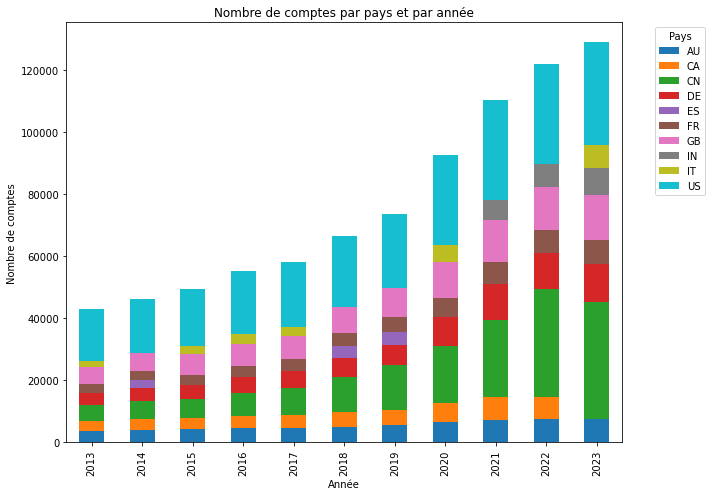

In [183]:
df_pivot = df.pivot_table(index='year', columns='country', values='count', aggfunc='sum', fill_value=0)
df_pivot.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Nombre de comptes par pays et par année')
plt.xlabel('Année')
plt.ylabel('Nombre de comptes')
plt.legend(title='Pays', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\haallat\AppData\Local\Temp\ipykernel_4872\1658938288.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{int(y)}%' for y in ax.get_yticks()], fontsize=15)


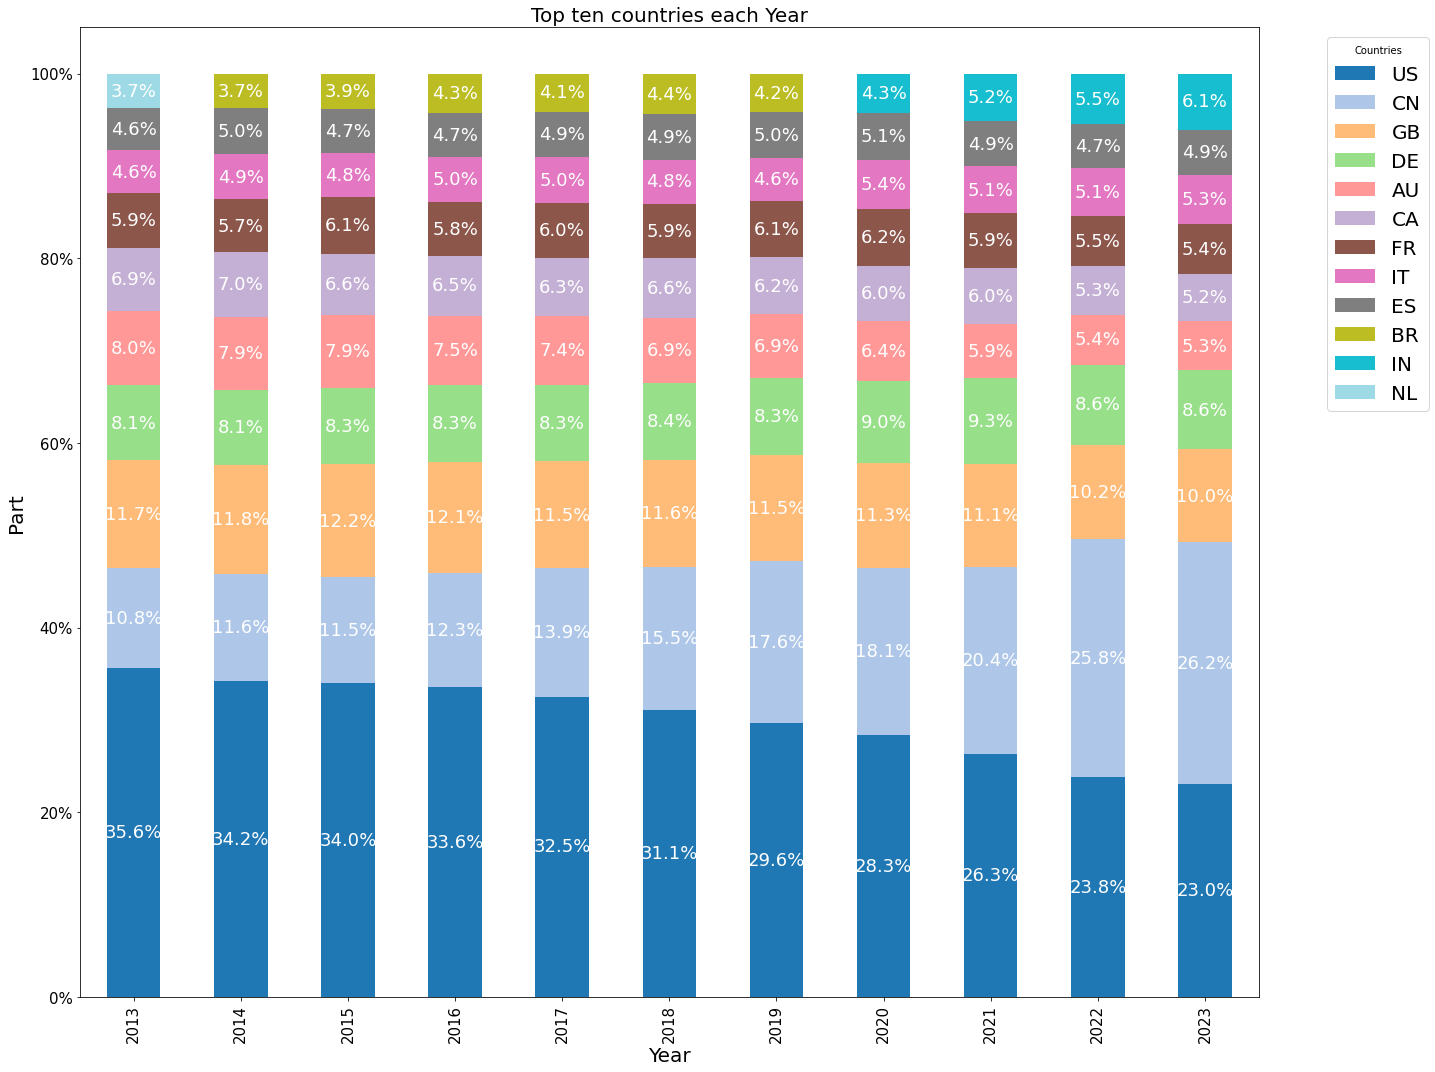

In [ ]:
df_pivot = df.pivot_table(index='year', columns='country', values='count', aggfunc='sum', fill_value=0)
df_pivot_percentage = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100
df_pivot_percentage = df_pivot_percentage.loc[:, df_pivot_percentage.sum(axis=0).sort_values(ascending=False).index]
colors = plt.cm.get_cmap('tab20', 12)  
ax = df_pivot_percentage.plot(kind='bar', stacked=True, figsize=(20, 15), color=colors.colors)

plt.title('Top ten countries each Year',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Part',fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_yticklabels([f'{int(y)}%' for y in ax.get_yticks()], fontsize=15)
plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=20)

for p in ax.patches:
    height = p.get_height()
    if height > 0: 
        width = p.get_width()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        percentage = height  
        ax.text(x, y, f'{percentage:.1f}%', ha='center', va='center', fontsize=18, color='white')


plt.tight_layout()
plt.show()

In [184]:
df = pd.DataFrame(dict_countries)
df['percentage'] = df.apply(lambda row: int(row['count']) / int(row['total']) * 100, axis=1)

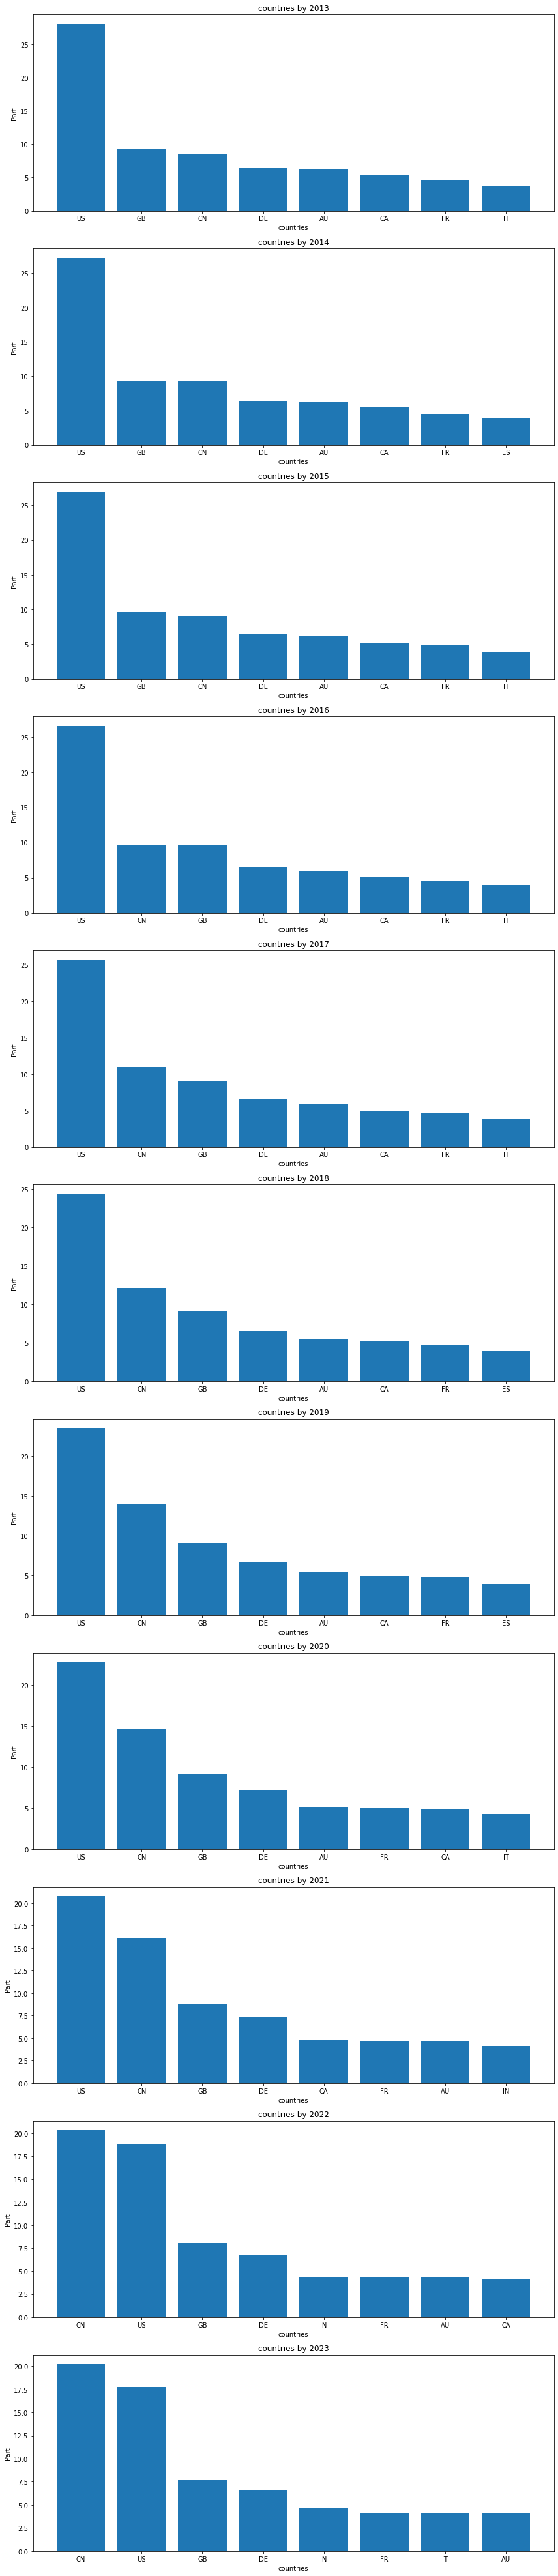

In [186]:
years = df['year'].unique()
fig, axes = plt.subplots(nrows=len(years), figsize=(12, len(years) * 5))

for i, year in enumerate(years):
    year_data = df[df['year'] == year]
    axes[i].bar(year_data['country'], year_data['percentage'])
    axes[i].set_title(f"countries by {year}")
    axes[i].set_ylabel('Part')
    axes[i].set_xlabel('countries')

plt.tight_layout()
plt.show()

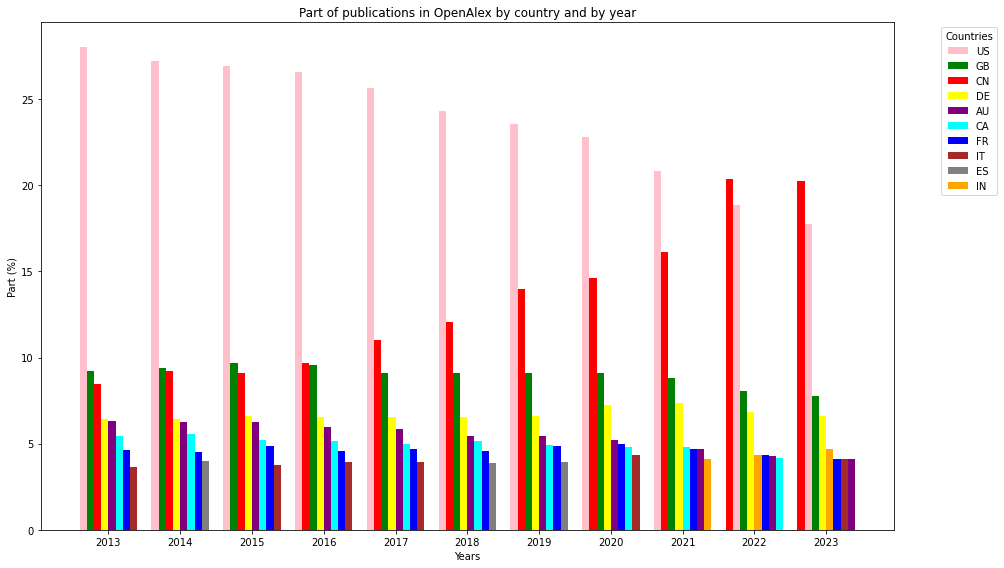

In [188]:
years = df['year'].unique()

color_dict = {
    'US': 'pink',
    'GB': 'green',
    'CN': 'red',
    'DE': 'yellow',
    'AU': 'purple',
    'CA': 'cyan',
    'FR': 'blue',
    'IN': 'orange',
    'IT': 'brown'
}

bar_width = 0.1
index = np.arange(len(years)) 
fig, ax = plt.subplots(figsize=(14, 8))

used_countries = set() 
for i, year in enumerate(years):
    year_data = df[df['year'] == year]
    
    top_8_countries = year_data.nlargest(8, 'count')['country']
    year_data_top_8 = year_data[year_data['country'].isin(top_8_countries)]
    
    for j, country in enumerate(top_8_countries):
        country_data = year_data_top_8[year_data_top_8['country'] == country]
        
        color = color_dict.get(country, 'gray')
        
        bar = ax.bar(index[i] + j * bar_width, country_data['percentage'], bar_width, label=country if country not in used_countries else "", color=color)
        
        if country not in used_countries:
            used_countries.add(country)

ax.set_xlabel('Years')
ax.set_ylabel('Part (%)')
ax.set_title('Part of publications in OpenAlex by country and by year')
ax.set_xticks(index + bar_width * 3.5)
ax.set_xticklabels(years)
ax.legend(title="Countries", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()